Multiclassification  Dog Breed.
This notebook builds an end-to end multi class image classifier using TensorFlow 2.0 and TensorFlow Hub.

Data Science and Machine Learning July 2025 LogiMojo Class Aug 23 and Aug 24 2025

1. Problem/Objective: How identify dog breed based on the images provided?
2. Data Collection and Organization: We are using the data from Kaggle's breed Identification https://www.kaggle.com/c/dog-breed-identification/data
3. Data Organization and evaluation: Unstructured data organized intp test and trianing, Figuring out the types of breed, transform the data into boolean.   
4. Feature Extraction: There are 120 breeds of dogs (this means there are 120 different classes).
There are around 10,00+ images in the training set (These images have labels).
There are around 10,000 images in the test set (these images have no labelsm because we'll want to predict them)
5. Model Trainin/Building: We are using Mobile V2 ent model to train for this data set. It is more of transfer learning.
6. Model Evaluation
7. Results Intrepretation and Visulaization

Unzip the data on to your drive

In [ ]:
#!unzip "/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/DataScienceMLProjects/Dog Vision"

In [ ]:
import datetime
print(datetime.datetime.now())


2025-08-25 01:03:12.423524


Get our workspace ready by importing necessary tools

TensorFlow 2.x
TensorFlow Hub
GPU run time

In [ ]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [ ]:
device_list = tf.config.list_physical_devices()
if "GPU" in [device.device_type for device in device_list]:
  print("GPU available")
  print(device_list)
else:
  print("GPU not available")
  print(device_list)

GPU available
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Getting our data ready (turning it into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (Numerical Representations)

Let's start by accessing our data and checking out the labels.

In [ ]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/labels.csv")
print(labels_csv.head())
print(labels_csv.describe())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126


Getting Images and their labels

Let's get a list of all our image file pathnames.

<Axes: xlabel='breed'>

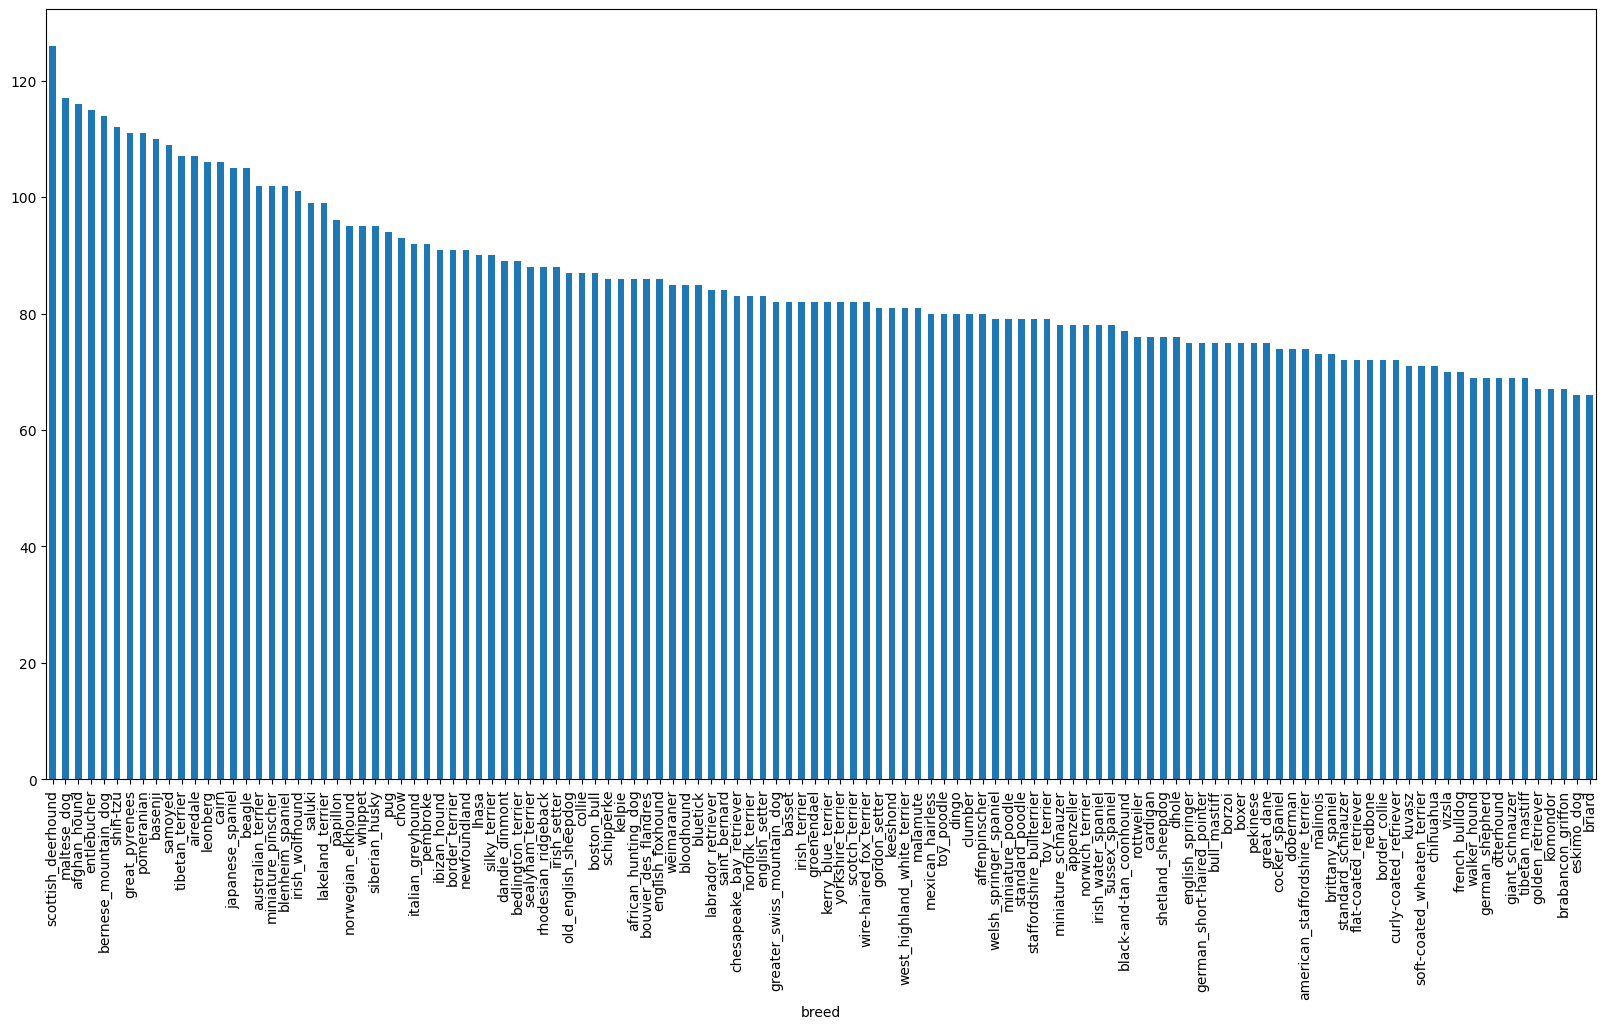

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/000bec180eb18c7604dcecc8fe0dba07.jpg")

FileNotFoundError: No such file or directory: '/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/000bec180eb18c7604dcecc8fe0dba07.jpg'

FileNotFoundError: No such file or directory: '/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/000bec180eb18c7604dcecc8fe0dba07.jpg'

<IPython.core.display.Image object>

In [ ]:
filenames = ["drive/My Drive/DataScienceMLProjects/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/My Drive/DataScienceMLProjects/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/DataScienceMLProjects/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/DataScienceMLProjects/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/DataScienceMLProjects/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/DataScienceMLProjects/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/DataScienceMLProjects/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/DataScienceMLProjects/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/DataScienceMLProjects/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/DataScienceMLProjects/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/DataScienceMLProjects/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
if len(os.listdir("drive/My Drive/DataScienceMLProjects/Dog Vision/train")) == len(filenames):
  print("All images are present")
else:
  print("Some images are missing")

All images are present


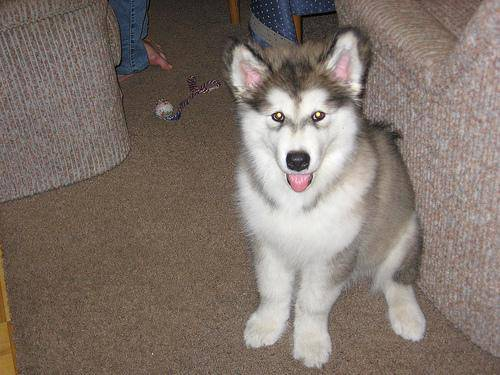

In [ ]:
Image(filenames[3000])

In [ ]:
labels_csv["breed"][3000]

'malamute'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
if len(labels) == len(filenames):
  print("Number of labels is equal to number of filenames")
else:
  print("Number of labels is not equal to number of filenames")

Number of labels is equal to number of filenames


In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:10]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
print(boolean_labels[0].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
X= filenames
y= boolean_labels

we're going to initiate experimenting with ~100 images and increase as needed.

In [ ]:
NUM_IMAGES = 1000

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
X_train[:5], y_train[:2]

(['drive/My Drive/DataScienceMLProjects/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/DataScienceMLProjects/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/DataScienceMLProjects/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/DataScienceMLProjects/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/DataScienceMLProjects/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,

Preprocessing images (turning images into Tensors)
to preprocess our images into Tensors we're going to write a function which does a few things:


1.   Take an image filepath as input
2.   Use TensorFlow to read the file and save it to a variable, image
3.   Turn our image (a jpg) into Tensors
4.   resize the image to be shape of (224,224)
5.   Return the modified image



In [ ]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(np.uint8(255), np.uint8(0))

In [ ]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

ow we've seen what an image looks like as a Tensor, let's make a function to preprocess them

1.   Take an image filepath as input
2.   Use TensorFlow to read the file and save it to a variable, image
3.   Turn our image (a jpg) into Tensors
4.   Normalize our Image (convert color channel values from 0-255 to 0-1)
5.   resize the image to be shape of (224,224)
6.   Return the modified image

In [ ]:
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [img_size, img_size])
  return image

In [ ]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [ ]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Turning our data into batches
Why turn our data into batches?

Let's say you're trting to process 10,000+ images in one go... they all might not fit into the memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be)

In order to use TensorFlow Effectively, we need out data in the form of Tensor tuples which look like this: (image, label).

In [ ]:
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(batch_size)
    return data_batch

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [ ]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Visualing Data Batches
Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

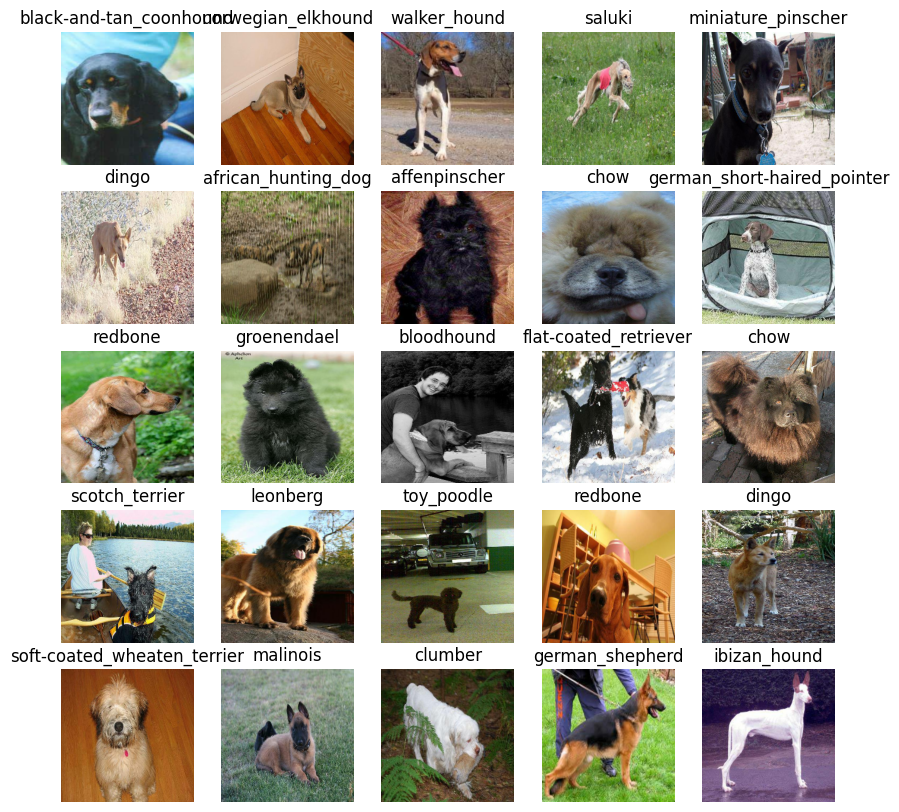

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

Building a model

Before we build a model, there are a few things we need to define:

```
# This is formatted as code
```



1.  The input shape (our images shape, in the form of Tensors) to our model.
2. The output shape (image labels, in the form of Tensors) of our model.
3. The URL of the model we want to use from TensorFlow Hub.


In [ ]:
# Setup input shape to the model
IMG_SIZE = 224
INPUT_SHAPE = [IMG_SIZE, IMG_SIZE, 3] # Batch, height width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
INPUT_SHAPE

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras Deep learning model! Knowing this, let's create a function which:

Takes the input shape, output shape and the model we've chosen as parameters.
Defines the layers Keras model in sequential fashion (do this first, then this, then that).
Compiles the model (says it should be evaluated and improved).
Builds the model (tells the model the input shape it'll be getting).
Returns the model.

In [ ]:
 # Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as keras
print ("Keras version:", keras.__version__)
print ("TF version:", tf.__version__)
print ("TF Hub version:", hub.__version__)

 # Check for GPU availability
 print("GPU", "available (YESSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available:(")

Keras version: 2.19.0
TF version: 2.19.0
TF Hub version: 0.16.1
GPU available (YESSS!!!!)


In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = keras.Sequential([
    hub.KerasLayer(MODEL_URL, input_shape=input_shape), # Layer 1 (input layer)
    keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
                               ])

  # Compile the model
  model.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


**Creating** **callbacks¶**

Call backs are helper function a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prev
ents our model from training for too long.

TensorBoard CallBack
To setup a TensorBoard callback, we need todo 3 things:

1. Load the TensorBoard extension ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function.✅
3. Visualize our models training logs with the %tensorboard magic function (we'll do this after model training).✅

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
import os

def create_tensorboard_callback():
  logdir = os.path.join("drive/My Drive/Data/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return keras.callbacks.TensorBoard(logdir)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [ ]:
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


Training a model (on subset of data)¶
Our first model is only going to train on 1000 images, to make sure everything is working

In [ ]:
NUM_EPOCHS = 10

Let's create a function which trains a model.

1. Create a model using create_model()
2. Setup a Tensorboard callback using create_tesorboard_callback()
3. call the fit() fuction on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
4. Return the model

In [ ]:
def train_model():
  model = create_model()
  tensorBoard = create_tensorboard_callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorBoard, early_stopping])
  return model

In [ ]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/10
25/25 [==============================] - 9s 185ms/step - loss: 4.4038 - accuracy: 0.1063 - val_loss: 3.5035 - val_accuracy: 0.1600
Epoch 2/10
25/25 [==============================] - 5s 196ms/step - loss: 1.5708 - accuracy: 0.7212 - val_loss: 2.2269 - val_accuracy: 0.4750
Epoch 3/10
25/25 [==============================] - 4s 148ms/step - loss: 0.5442 - accuracy: 0.9463 - val_loss: 1.7284 - val_accuracy: 0.5700
Epoch 4/10
25/25 [==============================] - 4s 180ms/step - loss: 0.2456 - accuracy: 0.9887 - val_loss: 1.5241 - val_accuracy: 0.6200
Epoch 5/10
25/25 [==============================] - 4s 153ms/step - loss: 0.1429 - accuracy: 0.9950 - val_loss: 1.4453 - val_accuracy: 0.6200
Epoch 6/10
25/25 [==============================] - 4s 151ms/step - loss: 0.0990 - accuracy: 1.0000 - val_loss: 1.3958 - val_accuracy: 0.6400
Epoch 7/10
25/25 [==============================] - 4s 

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs


Making and evaluating predictions using a trained model

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
predictions = model.predict(val_data, verbose=1)

7/7 [==============================] - 1s 169ms/step


In [ ]:
predictions

array([[1.0989970e-03, 7.4554569e-05, 5.8906642e-03, ..., 1.4591021e-04,
        2.3424025e-05, 3.5176119e-03],
       [1.4724296e-03, 3.3863549e-04, 5.1716850e-03, ..., 7.6636730e-04,
        1.6467351e-03, 4.1269854e-04],
       [4.8421067e-04, 2.2971454e-04, 4.8862192e-05, ..., 5.7288300e-04,
        3.3899557e-04, 8.8425737e-04],
       ...,
       [1.3239127e-05, 4.8705588e-05, 5.0290215e-05, ..., 2.4152554e-05,
        7.5840355e-05, 5.0314440e-05],
       [1.9340541e-03, 1.8659807e-04, 2.7640983e-05, ..., 1.6054021e-04,
        5.0059709e-05, 3.7953522e-02],
       [2.6041825e-04, 6.5035747e-05, 6.8615715e-04, ..., 5.2328006e-04,
        1.3247234e-03, 5.8749520e-05]], dtype=float32)

In [ ]:
np.sum(predictions[42])

np.float32(1.0)

In [ ]:
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[6.40684390e-04 9.69012181e-05 5.07800796e-05 2.03504533e-05
 3.80415795e-03 3.18542356e-04 1.72559841e-04 1.02298800e-03
 1.89560782e-02 1.31842084e-02 2.76246392e-05 3.45548142e-05
 7.31460575e-04 2.24606972e-03 1.00669777e-03 1.97290489e-03
 2.66193601e-05 2.81747663e-04 6.74839539e-05 4.63430624e-04
 1.07344589e-04 4.69995604e-04 1.56730064e-04 3.11225944e-04
 1.13644581e-02 1.52967637e-04 6.15613244e-05 8.50280630e-05
 6.56355172e-04 8.65832117e-05 5.78124964e-05 4.12786409e-04
 1.75101333e-04 1.71203337e-05 1.68162049e-04 2.49021941e-05
 7.84417934e-05 6.09124836e-04 5.51373960e-05 1.80707067e-01
 1.31157853e-04 4.61490490e-05 3.16916266e-03 1.02466540e-04
 2.06571611e-04 1.86115612e-05 1.14567571e-04 4.68278711e-04
 2.26166921e-05 8.86409194e-04 1.49544750e-04 1.96853129e-04
 1.64979356e-04 2.42693326e-03 1.17811296e-05 2.99245992e-04
 1.80610703e-04 1.39174910e-04 3.18774080e-04 4.29749707e-05
 6.33539094e-05 6.67680695e-04 1.68728075e-05 1.14120485e-04
 1.51425338e-04 1.256598

Having the above functionality is great but we want to be able to do it at scale.

And is would be even better if we could see the image the prediction is being made on!

Note: Prediction probabilities are also known as confidence levels.

In [ ]:
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[42])
pred_label

'walker_hound'

Now Since our validation data is still in a batch dataset, we'll have to unbatchify it to male predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
def unbatchify(data):

  images = []
  labels = []

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get :

1. Prediction labels
2. Validation labels (truth labels)
3. Validation images

Let's make some function to make these all a bit more visualize.

we'll create a function which :

1. Takes an array of prediction probabilities, an array of truth labels and array of images and an integers.✅
2. Convert the prediction probabailities to a predicted label.✅
3. Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.✅

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label, np.max(pred_prob)*100, true_label), color=color)


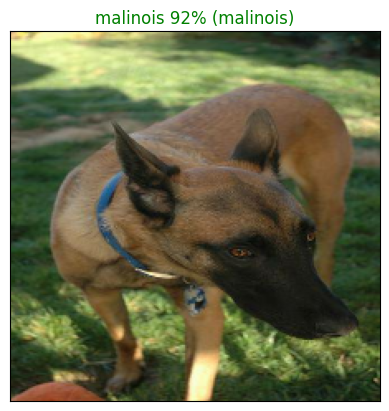

In [ ]:
plot_pred(predictions, val_labels, val_images,n=78)

Now we've got one function to visualize our models top prediction, let's make another to view our model top 10 predictions.

This function will:

1. Take an input of prediction probabilites array and a ground truth array and an integer
2. Find the prediction using get_pred_label()
3. Find the top 10:
  Prediction probabilities indexes✅
  Prediction probabailites values✅
  Prediction labels✅
4. Plot the top 10 prediction probability values and labels, coloring the true label green.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  pred_label = get_pred_label(pred_prob)

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), top_10_pred_values, color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)), labels=top_10_pred_labels, rotation="vertical")

  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

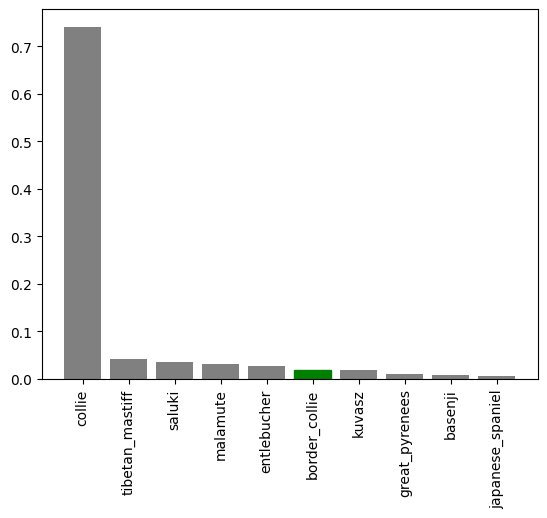

In [ ]:
plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=9)

Now we've got some function to help us visualize our predictions and evaluate our model, let's check out a few

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range (num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n= i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  #this line needs trouble shooting
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

##Saving and reloading a Trained model

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/DataScienceMLProjects/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/My Drive/DataScienceMLProjects/Dog Vision/models/20250825-01191756084750-1000-images-mobilenetv2-Adam.h5...


/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/DataScienceMLProjects/Dog Vision/models/20250825-01191756084750-1000-images-mobilenetv2-Adam.h5'

In [ ]:
loaded_1000_image_model = load_model("drive/My Drive/DataScienceMLProjects/Dog Vision/models/20250825-01191756084750-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: drive/My Drive/DataScienceMLProjects/Dog Vision/models/20250825-01191756084750-1000-images-mobilenetv2-Adam.h5


In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 1s 131ms/step - loss: 1.3156 - accuracy: 0.6450


[1.3155943155288696, 0.6449999809265137]

##Training a big dog model 🐶(on the full data)

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
full_data = create_data_batches(X,y)

Creating training data batches...


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
full_model_tensorboard = create_tensorboard_callback()

full_model_early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [ ]:
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/10
320/320 [==============================] - ETA: 0s - loss: 1.3441 - accuracy: 0.6698

320/320 [==============================] - 1777s 6s/step - loss: 1.3441 - accuracy: 0.6698
Epoch 2/10
319/320 [============================>.] - ETA: 0s - loss: 0.4054 - accuracy: 0.8774

320/320 [==============================] - 39s 121ms/step - loss: 0.4051 - accuracy: 0.8775
Epoch 3/10
319/320 [============================>.] - ETA: 0s - loss: 0.2376 - accuracy: 0.9347

320/320 [==============================] - 39s 123ms/step - loss: 0.2377 - accuracy: 0.9346
Epoch 4/10
319/320 [============================>.] - ETA: 0s - loss: 0.1559 - accuracy: 0.9617

320/320 [==============================] - 40s 124ms/step - loss: 0.1559 - accuracy: 0.9617
Epoch 5/10
319/320 [============================>.] - ETA: 0s - loss: 0.1061 - accuracy: 0.9791

320/320 [==============================] - 42s 130ms/step - loss: 0.1062 - accuracy: 0.9791
Epoch 6/10
319/320 [============================>.] - ETA: 0s - loss: 0.0763 - accuracy: 0.9869

320/320 [==============================] - 41s 129ms/step - loss: 0.0764 - accuracy: 0.9868
Epoch 7/10
319/320 [============================>.] - ETA: 0s - loss: 0.0588 - accuracy: 0.9920

320/320 [==============================] - 39s 122ms/step - loss: 0.0587 - accuracy: 0.9920
Epoch 8/10
319/320 [============================>.] - ETA: 0s - loss: 0.0483 - accuracy: 0.9935

320/320 [==============================] - 39s 122ms/step - loss: 0.0483 - accuracy: 0.9935
Epoch 9/10
320/320 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9953

320/320 [==============================] - 40s 124ms/step - loss: 0.0391 - accuracy: 0.9953
Epoch 10/10
319/320 [============================>.] - ETA: 0s - loss: 0.0302 - accuracy: 0.9970

320/320 [==============================] - 40s 125ms/step - loss: 0.0302 - accuracy: 0.9970


In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/DataScienceMLProjects/Dog Vision/models/20250825-02001756087210-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/DataScienceMLProjects/Dog Vision/models/20250825-02001756087210-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
loaded_full_model=load_model("drive/My Drive/DataScienceMLProjects/Dog Vision/models/20250825-02001756087210-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: drive/My Drive/DataScienceMLProjects/Dog Vision/models/20250825-02001756087210-full-image-set-mobilenetv2-Adam.h5


##Making predicion on the test dataset¶

since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created create_data_batches() earlier which can take a list of file names as input and cover them into Tensor batches.

To make predictions on the test data, we'll:

1. Get the test image file names ✅
2. Convert the file names into test data batches using create_data_batches() and setting the test_data parametes to True (since the test data doesn't have labels).✅
3. Make a predictions array by passing the test batches to the predict() method called on our model.

In [ ]:
test_path = "/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/e1444b7c629f6775432269bfd9c7e758.jpg',
 '/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/ddf0164ab3a269b179051bdecaea34b0.jpg',
 '/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/df38352b1f41c92d6750b87b55488ed4.jpg',
 '/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/e68da487dabcd11874830a177e8b6218.jpg',
 '/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/df7d17082d1b25eeba9be835a150db01.jpg',
 '/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/e61cd2626c01dd00117eca55fb099f5d.jpg',
 '/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/e2c0a9f66153b81eb27bb1bceb8c18dd.jpg',
 '/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/e46db7bcb804584eed8821ad4e132fd1.jpg',
 '/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/e66a91249a4979a86db48e5c64b81a88.jpg',
 '/content/drive/MyDrive/DataScienceMLProjects/Dog Vision/test/e7129bc2dbbba99bedc

In [ ]:
len(test_filenames)

10357

In [ ]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
test_predictions = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 292s 880ms/step


In [ ]:
np.savetxt("drive/MyDrive/DataScienceMLProjects/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
test_predictions = np.loadtxt("drive/MyDrive/DataScienceMLProjects/Dog Vision/preds_array.csv", delimiter=",")

##Preparing test dataset predictions for Kaggle¶
Looking at the Kaggle sample submission, we find that it wants our models prediction probability outputs in a DataFRame with an ID and a column for each different dog breed. https://www.kaggle.com./c/dog-breed-identification/overview/evaluation

to get the data in this format, we'll:

1. Create a panada DataFrame with an ID column as well as a column for each dog breed ✅
2. Add data to the ID column by extracting the test image ID's from their filepaths
3. Add data (the prediction probabilites) to each of the dog breed columns.
4. Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
test_ids = [os.path.splitext(fname)[0] for fname in os.listdir(test_path)]
preds_df["id"] = test_ids
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e1444b7c629f6775432269bfd9c7e758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ddf0164ab3a269b179051bdecaea34b0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,df38352b1f41c92d6750b87b55488ed4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e68da487dabcd11874830a177e8b6218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,df7d17082d1b25eeba9be835a150db01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e1444b7c629f6775432269bfd9c7e758,9.578906e-09,1.605201e-09,3.950524e-08,2.916854e-08,4.755858e-06,2.024922e-03,2.807578e-08,1.490763e-05,1.965143e-06,...,2.066067e-07,1.995033e-08,1.369588e-07,7.147877e-06,4.601081e-08,2.861756e-07,3.889745e-08,1.389835e-06,1.092713e-08,3.841867e-09
1,ddf0164ab3a269b179051bdecaea34b0,3.263747e-06,1.061966e-07,2.471696e-06,1.734629e-09,6.459983e-06,4.354919e-10,1.657941e-01,1.409811e-06,1.480706e-07,...,3.036422e-06,4.008476e-04,8.713984e-09,1.618494e-08,2.668354e-08,1.993224e-07,2.502952e-04,2.537260e-08,2.091181e-05,3.084732e-01
2,df38352b1f41c92d6750b87b55488ed4,1.238500e-12,2.516139e-06,1.033548e-10,2.614336e-06,1.904843e-08,1.084095e-08,1.661796e-07,6.105320e-11,3.699234e-09,...,1.148807e-10,5.960581e-11,1.293006e-07,2.031735e-06,3.796028e-09,5.645951e-10,2.137637e-11,1.452525e-09,1.206862e-09,1.288784e-10
3,e68da487dabcd11874830a177e8b6218,1.406341e-05,2.239650e-07,1.001080e-07,8.051728e-06,9.973473e-07,3.090085e-06,8.896163e-10,1.880336e-08,1.472597e-08,...,2.021906e-06,2.934587e-08,2.160249e-08,3.035339e-07,2.566245e-08,2.191059e-07,2.565372e-07,3.361986e-06,7.213796e-05,1.181218e-06
4,df7d17082d1b25eeba9be835a150db01,6.330304e-09,7.775154e-10,2.607134e-06,2.805519e-11,1.452157e-10,1.780789e-10,5.367400e-09,1.656368e-09,1.167051e-09,...,3.074253e-09,3.756769e-08,4.147763e-09,5.079915e-11,1.214954e-09,8.091453e-10,1.394934e-10,7.345883e-10,5.073530e-09,6.186606e-11


In [ ]:
preds_df.to_csv("drive/MyDrive/DataScienceMLProjects/Dog Vision/full_model_predictions_submission_1_mobilenetV2.csv", index=False)

Making predictions on custom images

To make prediction on custom images, we'll:

1. Get the filepaths of our own images.
2. Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
3. Pass the custom image data batch to out model's predict() method.
4. Convert the prediction output probabilities to predictions labels.
5. Compare the predicted labels to the custom images.

In [2]:
custom_path = "drive/My Drive/DataScienceMLProjects/Dog Vision/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

NameError: name 'os' is not defined

In [ ]:
custom_image_paths

In [ ]:
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range (len(custom_preds))]
custom_pred_labels

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
#Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
pred_prob = custom_preds

In [ ]:
custom_true_label = ("pug", "malinois", "malinois", "chihuahua", "malinois", "chihuahua", "malinois", "malinois", "malinois", "malinois")

In [ ]:
print(f"Images: {len(custom_images)}, Labels: {len(custom_true_label)}")
# Output should be: Images: 9, Labels: 9

In [ ]:
true_label2 = custom_true_label[i]

# Check custom image predictions
plt.figure (figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(3, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)


# Get confidence for THIS image
confidence = np.max(pred_prob[i]) * 100  # Index with [i]

# Change the colour of the title depending on if the prediction is right or wrong
if custom_pred_labels == custom_true_label:
  color = "green"
else:
  color = "red"

# Change plot title to be predicted, probability of prediction and the truth label
  plt.title(f"Pred: {pred_label} ({confidence:.0f}%)\nTrue: {true_label2}",
              color=color,
              fontsize=10)
  plt.imshow(image)
plt.tight_layout()